### Importação dos dados



In [21]:
import pandas as pd
import matplotlib.pyplot as plt


url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

todas_lojas = pd.concat([loja1, loja2, loja3, loja4])

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [22]:
todas_lojas = pd.concat([loja1, loja2, loja3, loja4])

In [26]:
faturamento_total = todas_lojas["Preço"].sum() + todas_lojas["frete"].sum()
print(f"Faturamento Total: R$ {faturamento_total:,.2f}")

Faturamento Total: R$ 6,184,421.45


# 2. Vendas por Categoria


In [30]:
vendas_categoria = todas_lojas.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)
print(vendas_categoria)


Categoria do Produto
eletronicos              2214099.72
eletrodomesticos         1766337.03
moveis                   1010214.00
instrumentos musicais     465029.67
esporte e lazer           190635.39
brinquedos                 98140.86
utilidades domesticas      76773.38
livros                     50260.74
Name: Preço, dtype: float64


# 3. Média de Avaliação das Lojas

In [32]:
media_avaliacao = {
    "Loja 1": loja1["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean()
}
print(media_avaliacao)

{'Loja 1': np.float64(3.976685036032217), 'Loja 2': np.float64(4.037303942348453), 'Loja 3': np.float64(4.048325561678677), 'Loja 4': np.float64(3.9957591178965224)}


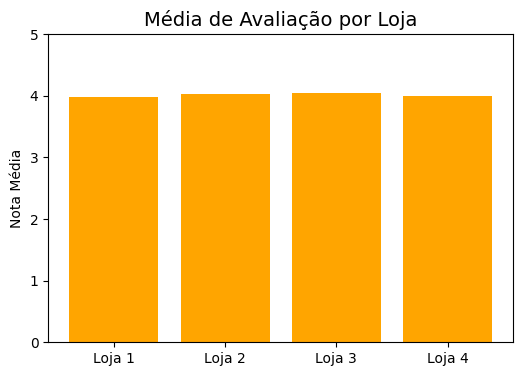

In [33]:
plt.figure(figsize=(6,4))
plt.bar(media_avaliacao.keys(), media_avaliacao.values(), color="orange")
plt.title("Média de Avaliação por Loja", fontsize=14)
plt.ylabel("Nota Média")
plt.ylim(0,5)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [37]:
mais_vendidos = todas_lojas["Produto"].value_counts().head(5)

print("Produtos mais vendidos:\n", mais_vendidos)


Produtos mais vendidos:
 Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Name: count, dtype: int64


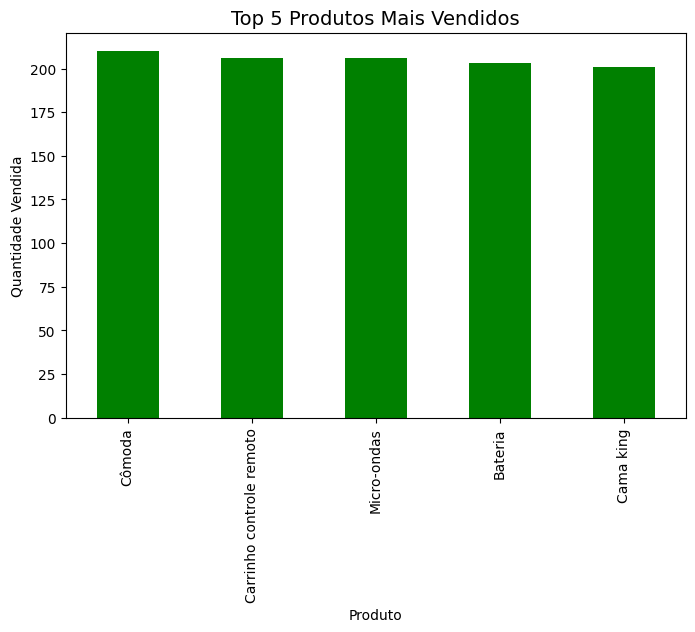

In [38]:
plt.figure(figsize=(8,5))
mais_vendidos.plot(kind="bar", color="green")
plt.title("Top 5 Produtos Mais Vendidos", fontsize=14)
plt.ylabel("Quantidade Vendida")
plt.show()



In [40]:
menos_vendidos = todas_lojas["Produto"].value_counts().tail(5)
print("\nProdutos menos vendidos:\n", menos_vendidos)


Produtos menos vendidos:
 Produto
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


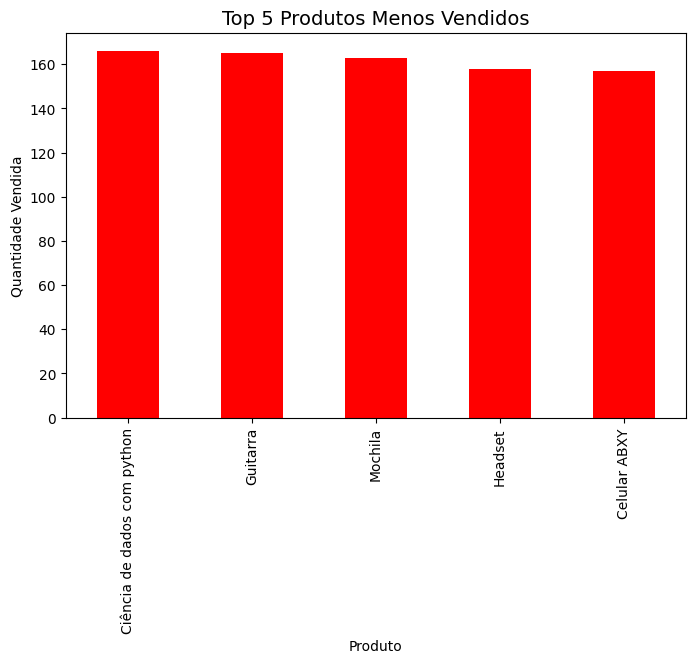

In [41]:
plt.figure(figsize=(8,5))
menos_vendidos.plot(kind="bar", color="red")
plt.title("Top 5 Produtos Menos Vendidos", fontsize=14)
plt.ylabel("Quantidade Vendida")
plt.show()


# 5. Frete Médio por Loja


In [43]:
frete_medio = {
    "Loja 1": loja1["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}
print(frete_medio)

{'Loja 1': np.float64(34.69180491551149), 'Loja 2': np.float64(33.62194065817927), 'Loja 3': np.float64(33.07446427411743), 'Loja 4': np.float64(31.278997081841727)}


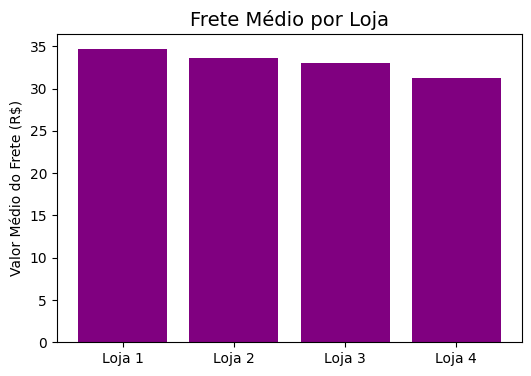

In [44]:
plt.figure(figsize=(6,4))
plt.bar(frete_medio.keys(), frete_medio.values(), color="purple")
plt.title("Frete Médio por Loja", fontsize=14)
plt.ylabel("Valor Médio do Frete (R$)")
plt.show()